# Tutorial 6.3. Structural Modeling Using Parametric Optimizable Beam Model

### Description: The structural modeling can be done by simplified MDoF system as seen in excercise 3. Here a robust and generic modeling of MDoF system is presented through a Parametric Optimizable beam. The beam model can be obtained from the github page [ParOptBeam](https://github.com/mpentek/ParOptBeam). This is a guide for setting up an example problem in the framework. The exercise demonstrates some of the capabilities and students are advised to check the implementation and other capabilities. 


Project: Structural Wind Engineering WS20-21
        Chair of Structural Analysis @ TUM - R. Wüchner, M. Péntek, A. Kodakkal
        
Author: anoop.kodakkal@tum.de, mate.pentek@tum.de

Created on:  12.12.2019

Last update: 20.12.2020

##### Contents:

 1. Input parameters
 2. Available beam models - Timoshenko, Euler-Bernoulli etc
 3. Available analysis type - Static, Dynamic, Eigen value analysis etc

### Step 0: Clone the repo
either

#### 1.  'git clone https://github.com/mpentek/ParOptBeam.git '

#### 2.  download as zip file the contents of [ParOptBeam](https://github.com/mpentek/ParOptBeam/archive/master.zip)

#### Important: Run this script from the directory ParOptBeam


importing the required packages and files 

In [5]:
# import
from source.model.structure_model import StraightBeam
from source.analysis.analysis_controller import AnalysisController

The inputs are defined as a dictionaries with various options. The options are as listed below with some basic explanations. Most of the naming are self explanatory. The unit system adopted are SI units(N,m,s) unless defined otherwise. 

__model_parameters__ : defines the details of the model
domain_size can be 2D or 3D 
other options for boundary_conditions 
* fixed-fixed
* pinned-pinned
* fixed-pinned
* pinned-fixed
* fixed-free
* free-fixed

In [6]:
# inputs 
parameters = {}

parameters["model_parameters"] = {
        "name": "GenericBuilding",
        "domain_size": "3D",
        "boundary_conditions": "fixed-free"}


__system_parameters__: defines the beam formulation 

available models are 
* Bernoulli beam
* Timoshenko beam
* Co-rotational beam

available models 
* Linear 
* Non-linear


In [7]:
parameters["model_parameters"]["system_parameters"]={
            "element_params": {
                "type": "Timoshenko",
                "is_nonlinear": False
            }}


__material_parameters__ : defines the material properties of the beam 

you may define the material properties of the beam

In [17]:

parameters["model_parameters"]["system_parameters"]["material"] = {
                "is_nonlinear": False,
                "density": 160.0,
                "youngs_modulus": 2.861e8,
                "poisson_ratio": 0.1,
                "damping_ratio": 0.0
            }

__geometry_parameters__ : defines the geometry of the structure

It is possible to define the various intervals of the structure with varying geometric parameters

number of elements indicate to the total number of elements and not on each intervals 
__coordinate system__
the following coordinate system may be (not necessarily) followed for the project 

x - along the longitudinal axis 

y - along the wind 

z - across the wind

In [23]:
parameters["model_parameters"]["system_parameters"]["geometry"] = {
                "length_x": 258.2,
                "number_of_elements": 3,
                "defined_on_intervals": [{
                    "interval_bounds" : [0.0, 60.0],
                    "length_y": [70.24],
                    "length_z": [39.02],
                    "area"    : [1212.7],
                    "shear_area_y" : [1212.7],
                    "shear_area_z" : [1212.7],
                    "moment_of_inertia_y" : [166100.0],
                    "moment_of_inertia_z" : [624400.0],
                    "torsional_moment_of_inertia" : [691771.0]},
                    {
                    "interval_bounds" : [60.0, 120.0],
                    "length_y": [70.24],
                    "length_z": [39.02],
                    "area"    : [1212.7],
                    "shear_area_y" : [1212.7],
                    "shear_area_z" : [1212.7],
                    "moment_of_inertia_y" : [166100.0],
                    "moment_of_inertia_z" : [624400.0],
                    "torsional_moment_of_inertia" : [691771.0]},
                    {
                    "interval_bounds" : [120.0, "End"],
                    "length_y": [70.24],
                    "length_z": [39.02],
                    "area"    : [1212.7],
                    "shear_area_y" : [1212.7],
                    "shear_area_z" : [1212.7],
                    "moment_of_inertia_y" : [166100.0],
                    "moment_of_inertia_z" : [624400.0],
                    "torsional_moment_of_inertia" : [691771.0]}]
            }


__optimization_parameters__: defines the optimization parameters for fine tuning the structure. 

It is possible to do an optimization of various structural parameters to match to eigen frequency for various modes. 
The density can also be optimized to match the total weight of the building. 

In [24]:
parameters["optimization_parameters"] =  {
        "adapt_for_target_values": {
            "density_for_total_mass": 38880000.0,
            "geometric_properties_for": {
                "help": "first entry: sway_y, second entry: sway_z, -1: shear, +1: bending",
                "partition_shear_bending": [-1, 1],
                "consider_decomposed_modes": ["sway_z","sway_y", "torsional"],
                "corresponding_mode_ids" : [1, 1, 1],
                "corresponding_eigenfrequencies": [0.23,0.20,0.40]}}
    }


__analysis_parameters__ : defines the analysis parameters options 

Report directory can be defined as relative/ absolute path

a skin model is also available to visualize the structure


In [25]:
parameters["analyses_parameters"] = {
        "global_output_folder" : "some/path",
        "model_properties": {
            "write": True,
            "plot":True
        }}
parameters["analyses_parameters"]["report_options"] = {
            "combine_plots_into_pdf" : True,
            "display_plots_on_screen" : False,
            "use_skin_model" : False
        }

__skin_model_parameters__ : defines the details of the skin model 

you may check out the other options available


In [26]:
parameters["analyses_parameters"]["skin_model_parameters"] = {
            "geometry": [ [0, -22.5, -15.0], [0, -22.5, 15], [0, 22.5, 15],
                          [0, 22.5, -15]
            ],
            "contour_density": 1,
            "record_animation": True,
            "visualize_line_structure": True,
            "beam_direction": "x",
            "scaling_vector": [1.0, 1.0 , 1.0, 1.0, 1.0, 1.0, 1.0],
            "eigenmode_scaling_factor" : 1e5,
            "dynamic_scaling_factor" : 1e3
        }


__Eigenvalue analysis__ : defines the options for eigen value analysis 

you may check out the other options available

In [27]:

parameters["analyses_parameters"]["runs"] = [{
                "type": "eigenvalue_analysis",
                "settings": {
                    "normalization": "mass_normalized"},
                "input":{},
                "output":{
                    "eigenmode_summary": {
                        "write" : True, 
                        "plot" : True},
                    "eigenmode_identification": {
                        "write" : True, 
                        "plot" : True},
                    "selected_eigenmode": {
                        "plot_mode": [1,2,3], 
                        "write_mode": [1,2,3],
                        "animate_mode": [1],
                        "animate_skin_model": []},
                    "selected_eigenmode_range": {
                        "help": "maximum 4 modes per range at a time",
                        "considered_ranges": [[1,2]], 
                        "plot_range": [True, True], 
                        "write_range": [True, False]}
                    }
            }]


__Dynamic analysis__: defines the options for dynamic analysis 


you may check out the other options available

Note : the force file should match the number of nodes / elements

__Tip: Take extra care on the time integration scheme and time step values__

In [28]:
parameters["analyses_parameters"]["runs"].append(dict({"type" : "dynamic_analysis",
                "settings": {
                    "solver_type": "Linear",
                    "run_in_modal_coordinates": False,
                    "time":{
                        "integration_scheme": "GenAlpha",
                        "start": 0.0,
                        "end": 600.0,
                        "step" : 0.02},
                    "intial_conditions": {
                        "displacement": "None",
                        "velocity": "None",
                        "acceleration" : "None"
                    }},
                "input": {
                    "help":"provide load file in the required format",
                    "file_path": "input/force/generic_building/dynamic_force_4_nodes.npy"
                },
                "output":{
                    "selected_instance": {
                        "plot_step": [1500, 2361], 
                        "write_step": [3276],
                        "plot_time": [30.5, 315.25], 
                        "write_time": [450.15]
                    },
                    "animate_time_history" : True,
                    "animate_skin_model_time_history": True,
                    "skin_model_animation_parameters":{
                        "start_record": 160,
                        "end_record": 200,
                        "record_step": 10
                    },
                    "selected_dof": {
                        "dof_list": [1, 2, 0, 4, 5, 3,
                                    -5, 
                                    -4, 
                                    -2, 
                                    -1],
                        "help": "result type can be a list containing: reaction, ext_force, displacement, velocity, acceleration",
                        "result_type": [["reaction"], ["reaction"], ["reaction"], ["reaction"], ["reaction"], ["reaction"],
                                        ["displacement", "velocity", "acceleration"], 
                                        ["displacement", "velocity", "acceleration"], 
                                        ["displacement", "velocity", "acceleration"], 
                                        ["displacement", "velocity", "acceleration"]],
                        "plot_result": [[True], [True], [True], [True], [True], [True],
                                        [True, True, True], 
                                        [True, True, True], 
                                        [True, False, True], 
                                        [True, False, True]],
                        "write_result": [[False],[False],[False],[True],[True],[True],
                                            [True, False, True], 
                                            [True, False, True], 
                                            [True, False, True], 
                                            [True, False, True]]
                    }
                }
            }))


__Static analysis__: defines the options for static analysis 

you may check out the other options available

Note: the force file should match the number of nodes / elements

In [29]:
parameters["analyses_parameters"]["runs"].append(dict({
                "type" : "static_analysis",
                "settings": {}, 
                "input":{
                    "help":"provide load file in the required format - either some symbolic generated or time step from dynamic",
                    "file_path": "input/force/generic_building/dynamic_force_4_nodes.npy",
                    "is_time_history_file" : True,
                    "selected_time_step" : 15000
                }, 
                "output":{
                    "plot": ["deformation", "forces"],
                    "write": ["deformation"]
                }
            }))


__Creates the beam model and evaluate responses__ 


No outrigger mass for interval 0
No outrigger mass for interval 1
No outrigger mass for interval 2
3D Timoshenko Beam Element 0
Initial coordinates: 
[0. 0. 0.]
[86.06666667  0.          0.        ]
A: 1212.7
Asy: 1212.7
Asz: 1212.7
Iy: 166100.0
Iz: 624400.0
Pz: 0.4881465399623507
Py: 1.8350313037476929

3D Timoshenko Beam Element 1
Initial coordinates: 
[86.06666667  0.          0.        ]
[172.13333333   0.           0.        ]
A: 1212.7
Asy: 1212.7
Asz: 1212.7
Iy: 166100.0
Iz: 624400.0
Pz: 0.4881465399623507
Py: 1.8350313037476929

3D Timoshenko Beam Element 2
Initial coordinates: 
[172.13333333   0.           0.        ]
[258.2   0.    0. ]
A: 1212.7
Asy: 1212.7
Asz: 1212.7
Iy: 166100.0
Iz: 624400.0
Pz: 0.4881465399623507
Py: 1.8350313037476929

parameters does not have "elastic_fixity_dofs"
[8349843.733333333, 16699687.466666667, 16699687.466666667, 8349843.733333333]
[8349843.733333333, 16699687.466666667, 16699687.466666667, 8349843.733333333]
BEFORE OPTIMIZATION
Result of dec

time: 12.04
time: 12.06
time: 12.08
time: 12.10
time: 12.12
time: 12.14
time: 12.16
time: 12.18
time: 12.20
time: 12.22
time: 12.24
time: 12.26
time: 12.28
time: 12.30
time: 12.32
time: 12.34
time: 12.36
time: 12.38
time: 12.40
time: 12.42
time: 12.44
time: 12.46
time: 12.48
time: 12.50
time: 12.52
time: 12.54
time: 12.56
time: 12.58
time: 12.60
time: 12.62
time: 12.64
time: 12.66
time: 12.68
time: 12.70
time: 12.72
time: 12.74
time: 12.76
time: 12.78
time: 12.80
time: 12.82
time: 12.84
time: 12.86
time: 12.88
time: 12.90
time: 12.92
time: 12.94
time: 12.96
time: 12.98
time: 13.00
time: 13.02
time: 13.04
time: 13.06
time: 13.08
time: 13.10
time: 13.12
time: 13.14
time: 13.16
time: 13.18
time: 13.20
time: 13.22
time: 13.24
time: 13.26
time: 13.28
time: 13.30
time: 13.32
time: 13.34
time: 13.36
time: 13.38
time: 13.40
time: 13.42
time: 13.44
time: 13.46
time: 13.48
time: 13.50
time: 13.52
time: 13.54
time: 13.56
time: 13.58
time: 13.60
time: 13.62
time: 13.64
time: 13.66
time: 13.68
time

time: 25.76
time: 25.78
time: 25.80
time: 25.82
time: 25.84
time: 25.86
time: 25.88
time: 25.90
time: 25.92
time: 25.94
time: 25.96
time: 25.98
time: 26.00
time: 26.02
time: 26.04
time: 26.06
time: 26.08
time: 26.10
time: 26.12
time: 26.14
time: 26.16
time: 26.18
time: 26.20
time: 26.22
time: 26.24
time: 26.26
time: 26.28
time: 26.30
time: 26.32
time: 26.34
time: 26.36
time: 26.38
time: 26.40
time: 26.42
time: 26.44
time: 26.46
time: 26.48
time: 26.50
time: 26.52
time: 26.54
time: 26.56
time: 26.58
time: 26.60
time: 26.62
time: 26.64
time: 26.66
time: 26.68
time: 26.70
time: 26.72
time: 26.74
time: 26.76
time: 26.78
time: 26.80
time: 26.82
time: 26.84
time: 26.86
time: 26.88
time: 26.90
time: 26.92
time: 26.94
time: 26.96
time: 26.98
time: 27.00
time: 27.02
time: 27.04
time: 27.06
time: 27.08
time: 27.10
time: 27.12
time: 27.14
time: 27.16
time: 27.18
time: 27.20
time: 27.22
time: 27.24
time: 27.26
time: 27.28
time: 27.30
time: 27.32
time: 27.34
time: 27.36
time: 27.38
time: 27.40
time

time: 41.04
time: 41.06
time: 41.08
time: 41.10
time: 41.12
time: 41.14
time: 41.16
time: 41.18
time: 41.20
time: 41.22
time: 41.24
time: 41.26
time: 41.28
time: 41.30
time: 41.32
time: 41.34
time: 41.36
time: 41.38
time: 41.40
time: 41.42
time: 41.44
time: 41.46
time: 41.48
time: 41.50
time: 41.52
time: 41.54
time: 41.56
time: 41.58
time: 41.60
time: 41.62
time: 41.64
time: 41.66
time: 41.68
time: 41.70
time: 41.72
time: 41.74
time: 41.76
time: 41.78
time: 41.80
time: 41.82
time: 41.84
time: 41.86
time: 41.88
time: 41.90
time: 41.92
time: 41.94
time: 41.96
time: 41.98
time: 42.00
time: 42.02
time: 42.04
time: 42.06
time: 42.08
time: 42.10
time: 42.12
time: 42.14
time: 42.16
time: 42.18
time: 42.20
time: 42.22
time: 42.24
time: 42.26
time: 42.28
time: 42.30
time: 42.32
time: 42.34
time: 42.36
time: 42.38
time: 42.40
time: 42.42
time: 42.44
time: 42.46
time: 42.48
time: 42.50
time: 42.52
time: 42.54
time: 42.56
time: 42.58
time: 42.60
time: 42.62
time: 42.64
time: 42.66
time: 42.68
time

time: 55.10
time: 55.12
time: 55.14
time: 55.16
time: 55.18
time: 55.20
time: 55.22
time: 55.24
time: 55.26
time: 55.28
time: 55.30
time: 55.32
time: 55.34
time: 55.36
time: 55.38
time: 55.40
time: 55.42
time: 55.44
time: 55.46
time: 55.48
time: 55.50
time: 55.52
time: 55.54
time: 55.56
time: 55.58
time: 55.60
time: 55.62
time: 55.64
time: 55.66
time: 55.68
time: 55.70
time: 55.72
time: 55.74
time: 55.76
time: 55.78
time: 55.80
time: 55.82
time: 55.84
time: 55.86
time: 55.88
time: 55.90
time: 55.92
time: 55.94
time: 55.96
time: 55.98
time: 56.00
time: 56.02
time: 56.04
time: 56.06
time: 56.08
time: 56.10
time: 56.12
time: 56.14
time: 56.16
time: 56.18
time: 56.20
time: 56.22
time: 56.24
time: 56.26
time: 56.28
time: 56.30
time: 56.32
time: 56.34
time: 56.36
time: 56.38
time: 56.40
time: 56.42
time: 56.44
time: 56.46
time: 56.48
time: 56.50
time: 56.52
time: 56.54
time: 56.56
time: 56.58
time: 56.60
time: 56.62
time: 56.64
time: 56.66
time: 56.68
time: 56.70
time: 56.72
time: 56.74
time

time: 81.86
time: 81.88
time: 81.90
time: 81.92
time: 81.94
time: 81.96
time: 81.98
time: 82.00
time: 82.02
time: 82.04
time: 82.06
time: 82.08
time: 82.10
time: 82.12
time: 82.14
time: 82.16
time: 82.18
time: 82.20
time: 82.22
time: 82.24
time: 82.26
time: 82.28
time: 82.30
time: 82.32
time: 82.34
time: 82.36
time: 82.38
time: 82.40
time: 82.42
time: 82.44
time: 82.46
time: 82.48
time: 82.50
time: 82.52
time: 82.54
time: 82.56
time: 82.58
time: 82.60
time: 82.62
time: 82.64
time: 82.66
time: 82.68
time: 82.70
time: 82.72
time: 82.74
time: 82.76
time: 82.78
time: 82.80
time: 82.82
time: 82.84
time: 82.86
time: 82.88
time: 82.90
time: 82.92
time: 82.94
time: 82.96
time: 82.98
time: 83.00
time: 83.02
time: 83.04
time: 83.06
time: 83.08
time: 83.10
time: 83.12
time: 83.14
time: 83.16
time: 83.18
time: 83.20
time: 83.22
time: 83.24
time: 83.26
time: 83.28
time: 83.30
time: 83.32
time: 83.34
time: 83.36
time: 83.38
time: 83.40
time: 83.42
time: 83.44
time: 83.46
time: 83.48
time: 83.50
time

time: 95.78
time: 95.80
time: 95.82
time: 95.84
time: 95.86
time: 95.88
time: 95.90
time: 95.92
time: 95.94
time: 95.96
time: 95.98
time: 96.00
time: 96.02
time: 96.04
time: 96.06
time: 96.08
time: 96.10
time: 96.12
time: 96.14
time: 96.16
time: 96.18
time: 96.20
time: 96.22
time: 96.24
time: 96.26
time: 96.28
time: 96.30
time: 96.32
time: 96.34
time: 96.36
time: 96.38
time: 96.40
time: 96.42
time: 96.44
time: 96.46
time: 96.48
time: 96.50
time: 96.52
time: 96.54
time: 96.56
time: 96.58
time: 96.60
time: 96.62
time: 96.64
time: 96.66
time: 96.68
time: 96.70
time: 96.72
time: 96.74
time: 96.76
time: 96.78
time: 96.80
time: 96.82
time: 96.84
time: 96.86
time: 96.88
time: 96.90
time: 96.92
time: 96.94
time: 96.96
time: 96.98
time: 97.00
time: 97.02
time: 97.04
time: 97.06
time: 97.08
time: 97.10
time: 97.12
time: 97.14
time: 97.16
time: 97.18
time: 97.20
time: 97.22
time: 97.24
time: 97.26
time: 97.28
time: 97.30
time: 97.32
time: 97.34
time: 97.36
time: 97.38
time: 97.40
time: 97.42
time

time: 109.54
time: 109.56
time: 109.58
time: 109.60
time: 109.62
time: 109.64
time: 109.66
time: 109.68
time: 109.70
time: 109.72
time: 109.74
time: 109.76
time: 109.78
time: 109.80
time: 109.82
time: 109.84
time: 109.86
time: 109.88
time: 109.90
time: 109.92
time: 109.94
time: 109.96
time: 109.98
time: 110.00
time: 110.02
time: 110.04
time: 110.06
time: 110.08
time: 110.10
time: 110.12
time: 110.14
time: 110.16
time: 110.18
time: 110.20
time: 110.22
time: 110.24
time: 110.26
time: 110.28
time: 110.30
time: 110.32
time: 110.34
time: 110.36
time: 110.38
time: 110.40
time: 110.42
time: 110.44
time: 110.46
time: 110.48
time: 110.50
time: 110.52
time: 110.54
time: 110.56
time: 110.58
time: 110.60
time: 110.62
time: 110.64
time: 110.66
time: 110.68
time: 110.70
time: 110.72
time: 110.74
time: 110.76
time: 110.78
time: 110.80
time: 110.82
time: 110.84
time: 110.86
time: 110.88
time: 110.90
time: 110.92
time: 110.94
time: 110.96
time: 110.98
time: 111.00
time: 111.02
time: 111.04
time: 111.06

time: 124.60
time: 124.62
time: 124.64
time: 124.66
time: 124.68
time: 124.70
time: 124.72
time: 124.74
time: 124.76
time: 124.78
time: 124.80
time: 124.82
time: 124.84
time: 124.86
time: 124.88
time: 124.90
time: 124.92
time: 124.94
time: 124.96
time: 124.98
time: 125.00
time: 125.02
time: 125.04
time: 125.06
time: 125.08
time: 125.10
time: 125.12
time: 125.14
time: 125.16
time: 125.18
time: 125.20
time: 125.22
time: 125.24
time: 125.26
time: 125.28
time: 125.30
time: 125.32
time: 125.34
time: 125.36
time: 125.38
time: 125.40
time: 125.42
time: 125.44
time: 125.46
time: 125.48
time: 125.50
time: 125.52
time: 125.54
time: 125.56
time: 125.58
time: 125.60
time: 125.62
time: 125.64
time: 125.66
time: 125.68
time: 125.70
time: 125.72
time: 125.74
time: 125.76
time: 125.78
time: 125.80
time: 125.82
time: 125.84
time: 125.86
time: 125.88
time: 125.90
time: 125.92
time: 125.94
time: 125.96
time: 125.98
time: 126.00
time: 126.02
time: 126.04
time: 126.06
time: 126.08
time: 126.10
time: 126.12

time: 137.94
time: 137.96
time: 137.98
time: 138.00
time: 138.02
time: 138.04
time: 138.06
time: 138.08
time: 138.10
time: 138.12
time: 138.14
time: 138.16
time: 138.18
time: 138.20
time: 138.22
time: 138.24
time: 138.26
time: 138.28
time: 138.30
time: 138.32
time: 138.34
time: 138.36
time: 138.38
time: 138.40
time: 138.42
time: 138.44
time: 138.46
time: 138.48
time: 138.50
time: 138.52
time: 138.54
time: 138.56
time: 138.58
time: 138.60
time: 138.62
time: 138.64
time: 138.66
time: 138.68
time: 138.70
time: 138.72
time: 138.74
time: 138.76
time: 138.78
time: 138.80
time: 138.82
time: 138.84
time: 138.86
time: 138.88
time: 138.90
time: 138.92
time: 138.94
time: 138.96
time: 138.98
time: 139.00
time: 139.02
time: 139.04
time: 139.06
time: 139.08
time: 139.10
time: 139.12
time: 139.14
time: 139.16
time: 139.18
time: 139.20
time: 139.22
time: 139.24
time: 139.26
time: 139.28
time: 139.30
time: 139.32
time: 139.34
time: 139.36
time: 139.38
time: 139.40
time: 139.42
time: 139.44
time: 139.46

time: 151.50
time: 151.52
time: 151.54
time: 151.56
time: 151.58
time: 151.60
time: 151.62
time: 151.64
time: 151.66
time: 151.68
time: 151.70
time: 151.72
time: 151.74
time: 151.76
time: 151.78
time: 151.80
time: 151.82
time: 151.84
time: 151.86
time: 151.88
time: 151.90
time: 151.92
time: 151.94
time: 151.96
time: 151.98
time: 152.00
time: 152.02
time: 152.04
time: 152.06
time: 152.08
time: 152.10
time: 152.12
time: 152.14
time: 152.16
time: 152.18
time: 152.20
time: 152.22
time: 152.24
time: 152.26
time: 152.28
time: 152.30
time: 152.32
time: 152.34
time: 152.36
time: 152.38
time: 152.40
time: 152.42
time: 152.44
time: 152.46
time: 152.48
time: 152.50
time: 152.52
time: 152.54
time: 152.56
time: 152.58
time: 152.60
time: 152.62
time: 152.64
time: 152.66
time: 152.68
time: 152.70
time: 152.72
time: 152.74
time: 152.76
time: 152.78
time: 152.80
time: 152.82
time: 152.84
time: 152.86
time: 152.88
time: 152.90
time: 152.92
time: 152.94
time: 152.96
time: 152.98
time: 153.00
time: 153.02

time: 164.70
time: 164.72
time: 164.74
time: 164.76
time: 164.78
time: 164.80
time: 164.82
time: 164.84
time: 164.86
time: 164.88
time: 164.90
time: 164.92
time: 164.94
time: 164.96
time: 164.98
time: 165.00
time: 165.02
time: 165.04
time: 165.06
time: 165.08
time: 165.10
time: 165.12
time: 165.14
time: 165.16
time: 165.18
time: 165.20
time: 165.22
time: 165.24
time: 165.26
time: 165.28
time: 165.30
time: 165.32
time: 165.34
time: 165.36
time: 165.38
time: 165.40
time: 165.42
time: 165.44
time: 165.46
time: 165.48
time: 165.50
time: 165.52
time: 165.54
time: 165.56
time: 165.58
time: 165.60
time: 165.62
time: 165.64
time: 165.66
time: 165.68
time: 165.70
time: 165.72
time: 165.74
time: 165.76
time: 165.78
time: 165.80
time: 165.82
time: 165.84
time: 165.86
time: 165.88
time: 165.90
time: 165.92
time: 165.94
time: 165.96
time: 165.98
time: 166.00
time: 166.02
time: 166.04
time: 166.06
time: 166.08
time: 166.10
time: 166.12
time: 166.14
time: 166.16
time: 166.18
time: 166.20
time: 166.22

time: 177.86
time: 177.88
time: 177.90
time: 177.92
time: 177.94
time: 177.96
time: 177.98
time: 178.00
time: 178.02
time: 178.04
time: 178.06
time: 178.08
time: 178.10
time: 178.12
time: 178.14
time: 178.16
time: 178.18
time: 178.20
time: 178.22
time: 178.24
time: 178.26
time: 178.28
time: 178.30
time: 178.32
time: 178.34
time: 178.36
time: 178.38
time: 178.40
time: 178.42
time: 178.44
time: 178.46
time: 178.48
time: 178.50
time: 178.52
time: 178.54
time: 178.56
time: 178.58
time: 178.60
time: 178.62
time: 178.64
time: 178.66
time: 178.68
time: 178.70
time: 178.72
time: 178.74
time: 178.76
time: 178.78
time: 178.80
time: 178.82
time: 178.84
time: 178.86
time: 178.88
time: 178.90
time: 178.92
time: 178.94
time: 178.96
time: 178.98
time: 179.00
time: 179.02
time: 179.04
time: 179.06
time: 179.08
time: 179.10
time: 179.12
time: 179.14
time: 179.16
time: 179.18
time: 179.20
time: 179.22
time: 179.24
time: 179.26
time: 179.28
time: 179.30
time: 179.32
time: 179.34
time: 179.36
time: 179.38

time: 204.48
time: 204.50
time: 204.52
time: 204.54
time: 204.56
time: 204.58
time: 204.60
time: 204.62
time: 204.64
time: 204.66
time: 204.68
time: 204.70
time: 204.72
time: 204.74
time: 204.76
time: 204.78
time: 204.80
time: 204.82
time: 204.84
time: 204.86
time: 204.88
time: 204.90
time: 204.92
time: 204.94
time: 204.96
time: 204.98
time: 205.00
time: 205.02
time: 205.04
time: 205.06
time: 205.08
time: 205.10
time: 205.12
time: 205.14
time: 205.16
time: 205.18
time: 205.20
time: 205.22
time: 205.24
time: 205.26
time: 205.28
time: 205.30
time: 205.32
time: 205.34
time: 205.36
time: 205.38
time: 205.40
time: 205.42
time: 205.44
time: 205.46
time: 205.48
time: 205.50
time: 205.52
time: 205.54
time: 205.56
time: 205.58
time: 205.60
time: 205.62
time: 205.64
time: 205.66
time: 205.68
time: 205.70
time: 205.72
time: 205.74
time: 205.76
time: 205.78
time: 205.80
time: 205.82
time: 205.84
time: 205.86
time: 205.88
time: 205.90
time: 205.92
time: 205.94
time: 205.96
time: 205.98
time: 206.00

time: 218.16
time: 218.18
time: 218.20
time: 218.22
time: 218.24
time: 218.26
time: 218.28
time: 218.30
time: 218.32
time: 218.34
time: 218.36
time: 218.38
time: 218.40
time: 218.42
time: 218.44
time: 218.46
time: 218.48
time: 218.50
time: 218.52
time: 218.54
time: 218.56
time: 218.58
time: 218.60
time: 218.62
time: 218.64
time: 218.66
time: 218.68
time: 218.70
time: 218.72
time: 218.74
time: 218.76
time: 218.78
time: 218.80
time: 218.82
time: 218.84
time: 218.86
time: 218.88
time: 218.90
time: 218.92
time: 218.94
time: 218.96
time: 218.98
time: 219.00
time: 219.02
time: 219.04
time: 219.06
time: 219.08
time: 219.10
time: 219.12
time: 219.14
time: 219.16
time: 219.18
time: 219.20
time: 219.22
time: 219.24
time: 219.26
time: 219.28
time: 219.30
time: 219.32
time: 219.34
time: 219.36
time: 219.38
time: 219.40
time: 219.42
time: 219.44
time: 219.46
time: 219.48
time: 219.50
time: 219.52
time: 219.54
time: 219.56
time: 219.58
time: 219.60
time: 219.62
time: 219.64
time: 219.66
time: 219.68

time: 231.02
time: 231.04
time: 231.06
time: 231.08
time: 231.10
time: 231.12
time: 231.14
time: 231.16
time: 231.18
time: 231.20
time: 231.22
time: 231.24
time: 231.26
time: 231.28
time: 231.30
time: 231.32
time: 231.34
time: 231.36
time: 231.38
time: 231.40
time: 231.42
time: 231.44
time: 231.46
time: 231.48
time: 231.50
time: 231.52
time: 231.54
time: 231.56
time: 231.58
time: 231.60
time: 231.62
time: 231.64
time: 231.66
time: 231.68
time: 231.70
time: 231.72
time: 231.74
time: 231.76
time: 231.78
time: 231.80
time: 231.82
time: 231.84
time: 231.86
time: 231.88
time: 231.90
time: 231.92
time: 231.94
time: 231.96
time: 231.98
time: 232.00
time: 232.02
time: 232.04
time: 232.06
time: 232.08
time: 232.10
time: 232.12
time: 232.14
time: 232.16
time: 232.18
time: 232.20
time: 232.22
time: 232.24
time: 232.26
time: 232.28
time: 232.30
time: 232.32
time: 232.34
time: 232.36
time: 232.38
time: 232.40
time: 232.42
time: 232.44
time: 232.46
time: 232.48
time: 232.50
time: 232.52
time: 232.54

time: 244.20
time: 244.22
time: 244.24
time: 244.26
time: 244.28
time: 244.30
time: 244.32
time: 244.34
time: 244.36
time: 244.38
time: 244.40
time: 244.42
time: 244.44
time: 244.46
time: 244.48
time: 244.50
time: 244.52
time: 244.54
time: 244.56
time: 244.58
time: 244.60
time: 244.62
time: 244.64
time: 244.66
time: 244.68
time: 244.70
time: 244.72
time: 244.74
time: 244.76
time: 244.78
time: 244.80
time: 244.82
time: 244.84
time: 244.86
time: 244.88
time: 244.90
time: 244.92
time: 244.94
time: 244.96
time: 244.98
time: 245.00
time: 245.02
time: 245.04
time: 245.06
time: 245.08
time: 245.10
time: 245.12
time: 245.14
time: 245.16
time: 245.18
time: 245.20
time: 245.22
time: 245.24
time: 245.26
time: 245.28
time: 245.30
time: 245.32
time: 245.34
time: 245.36
time: 245.38
time: 245.40
time: 245.42
time: 245.44
time: 245.46
time: 245.48
time: 245.50
time: 245.52
time: 245.54
time: 245.56
time: 245.58
time: 245.60
time: 245.62
time: 245.64
time: 245.66
time: 245.68
time: 245.70
time: 245.72

time: 258.40
time: 258.42
time: 258.44
time: 258.46
time: 258.48
time: 258.50
time: 258.52
time: 258.54
time: 258.56
time: 258.58
time: 258.60
time: 258.62
time: 258.64
time: 258.66
time: 258.68
time: 258.70
time: 258.72
time: 258.74
time: 258.76
time: 258.78
time: 258.80
time: 258.82
time: 258.84
time: 258.86
time: 258.88
time: 258.90
time: 258.92
time: 258.94
time: 258.96
time: 258.98
time: 259.00
time: 259.02
time: 259.04
time: 259.06
time: 259.08
time: 259.10
time: 259.12
time: 259.14
time: 259.16
time: 259.18
time: 259.20
time: 259.22
time: 259.24
time: 259.26
time: 259.28
time: 259.30
time: 259.32
time: 259.34
time: 259.36
time: 259.38
time: 259.40
time: 259.42
time: 259.44
time: 259.46
time: 259.48
time: 259.50
time: 259.52
time: 259.54
time: 259.56
time: 259.58
time: 259.60
time: 259.62
time: 259.64
time: 259.66
time: 259.68
time: 259.70
time: 259.72
time: 259.74
time: 259.76
time: 259.78
time: 259.80
time: 259.82
time: 259.84
time: 259.86
time: 259.88
time: 259.90
time: 259.92

time: 272.74
time: 272.76
time: 272.78
time: 272.80
time: 272.82
time: 272.84
time: 272.86
time: 272.88
time: 272.90
time: 272.92
time: 272.94
time: 272.96
time: 272.98
time: 273.00
time: 273.02
time: 273.04
time: 273.06
time: 273.08
time: 273.10
time: 273.12
time: 273.14
time: 273.16
time: 273.18
time: 273.20
time: 273.22
time: 273.24
time: 273.26
time: 273.28
time: 273.30
time: 273.32
time: 273.34
time: 273.36
time: 273.38
time: 273.40
time: 273.42
time: 273.44
time: 273.46
time: 273.48
time: 273.50
time: 273.52
time: 273.54
time: 273.56
time: 273.58
time: 273.60
time: 273.62
time: 273.64
time: 273.66
time: 273.68
time: 273.70
time: 273.72
time: 273.74
time: 273.76
time: 273.78
time: 273.80
time: 273.82
time: 273.84
time: 273.86
time: 273.88
time: 273.90
time: 273.92
time: 273.94
time: 273.96
time: 273.98
time: 274.00
time: 274.02
time: 274.04
time: 274.06
time: 274.08
time: 274.10
time: 274.12
time: 274.14
time: 274.16
time: 274.18
time: 274.20
time: 274.22
time: 274.24
time: 274.26

time: 286.14
time: 286.16
time: 286.18
time: 286.20
time: 286.22
time: 286.24
time: 286.26
time: 286.28
time: 286.30
time: 286.32
time: 286.34
time: 286.36
time: 286.38
time: 286.40
time: 286.42
time: 286.44
time: 286.46
time: 286.48
time: 286.50
time: 286.52
time: 286.54
time: 286.56
time: 286.58
time: 286.60
time: 286.62
time: 286.64
time: 286.66
time: 286.68
time: 286.70
time: 286.72
time: 286.74
time: 286.76
time: 286.78
time: 286.80
time: 286.82
time: 286.84
time: 286.86
time: 286.88
time: 286.90
time: 286.92
time: 286.94
time: 286.96
time: 286.98
time: 287.00
time: 287.02
time: 287.04
time: 287.06
time: 287.08
time: 287.10
time: 287.12
time: 287.14
time: 287.16
time: 287.18
time: 287.20
time: 287.22
time: 287.24
time: 287.26
time: 287.28
time: 287.30
time: 287.32
time: 287.34
time: 287.36
time: 287.38
time: 287.40
time: 287.42
time: 287.44
time: 287.46
time: 287.48
time: 287.50
time: 287.52
time: 287.54
time: 287.56
time: 287.58
time: 287.60
time: 287.62
time: 287.64
time: 287.66

time: 300.70
time: 300.72
time: 300.74
time: 300.76
time: 300.78
time: 300.80
time: 300.82
time: 300.84
time: 300.86
time: 300.88
time: 300.90
time: 300.92
time: 300.94
time: 300.96
time: 300.98
time: 301.00
time: 301.02
time: 301.04
time: 301.06
time: 301.08
time: 301.10
time: 301.12
time: 301.14
time: 301.16
time: 301.18
time: 301.20
time: 301.22
time: 301.24
time: 301.26
time: 301.28
time: 301.30
time: 301.32
time: 301.34
time: 301.36
time: 301.38
time: 301.40
time: 301.42
time: 301.44
time: 301.46
time: 301.48
time: 301.50
time: 301.52
time: 301.54
time: 301.56
time: 301.58
time: 301.60
time: 301.62
time: 301.64
time: 301.66
time: 301.68
time: 301.70
time: 301.72
time: 301.74
time: 301.76
time: 301.78
time: 301.80
time: 301.82
time: 301.84
time: 301.86
time: 301.88
time: 301.90
time: 301.92
time: 301.94
time: 301.96
time: 301.98
time: 302.00
time: 302.02
time: 302.04
time: 302.06
time: 302.08
time: 302.10
time: 302.12
time: 302.14
time: 302.16
time: 302.18
time: 302.20
time: 302.22

time: 316.50
time: 316.52
time: 316.54
time: 316.56
time: 316.58
time: 316.60
time: 316.62
time: 316.64
time: 316.66
time: 316.68
time: 316.70
time: 316.72
time: 316.74
time: 316.76
time: 316.78
time: 316.80
time: 316.82
time: 316.84
time: 316.86
time: 316.88
time: 316.90
time: 316.92
time: 316.94
time: 316.96
time: 316.98
time: 317.00
time: 317.02
time: 317.04
time: 317.06
time: 317.08
time: 317.10
time: 317.12
time: 317.14
time: 317.16
time: 317.18
time: 317.20
time: 317.22
time: 317.24
time: 317.26
time: 317.28
time: 317.30
time: 317.32
time: 317.34
time: 317.36
time: 317.38
time: 317.40
time: 317.42
time: 317.44
time: 317.46
time: 317.48
time: 317.50
time: 317.52
time: 317.54
time: 317.56
time: 317.58
time: 317.60
time: 317.62
time: 317.64
time: 317.66
time: 317.68
time: 317.70
time: 317.72
time: 317.74
time: 317.76
time: 317.78
time: 317.80
time: 317.82
time: 317.84
time: 317.86
time: 317.88
time: 317.90
time: 317.92
time: 317.94
time: 317.96
time: 317.98
time: 318.00
time: 318.02

time: 331.44
time: 331.46
time: 331.48
time: 331.50
time: 331.52
time: 331.54
time: 331.56
time: 331.58
time: 331.60
time: 331.62
time: 331.64
time: 331.66
time: 331.68
time: 331.70
time: 331.72
time: 331.74
time: 331.76
time: 331.78
time: 331.80
time: 331.82
time: 331.84
time: 331.86
time: 331.88
time: 331.90
time: 331.92
time: 331.94
time: 331.96
time: 331.98
time: 332.00
time: 332.02
time: 332.04
time: 332.06
time: 332.08
time: 332.10
time: 332.12
time: 332.14
time: 332.16
time: 332.18
time: 332.20
time: 332.22
time: 332.24
time: 332.26
time: 332.28
time: 332.30
time: 332.32
time: 332.34
time: 332.36
time: 332.38
time: 332.40
time: 332.42
time: 332.44
time: 332.46
time: 332.48
time: 332.50
time: 332.52
time: 332.54
time: 332.56
time: 332.58
time: 332.60
time: 332.62
time: 332.64
time: 332.66
time: 332.68
time: 332.70
time: 332.72
time: 332.74
time: 332.76
time: 332.78
time: 332.80
time: 332.82
time: 332.84
time: 332.86
time: 332.88
time: 332.90
time: 332.92
time: 332.94
time: 332.96

time: 347.20
time: 347.22
time: 347.24
time: 347.26
time: 347.28
time: 347.30
time: 347.32
time: 347.34
time: 347.36
time: 347.38
time: 347.40
time: 347.42
time: 347.44
time: 347.46
time: 347.48
time: 347.50
time: 347.52
time: 347.54
time: 347.56
time: 347.58
time: 347.60
time: 347.62
time: 347.64
time: 347.66
time: 347.68
time: 347.70
time: 347.72
time: 347.74
time: 347.76
time: 347.78
time: 347.80
time: 347.82
time: 347.84
time: 347.86
time: 347.88
time: 347.90
time: 347.92
time: 347.94
time: 347.96
time: 347.98
time: 348.00
time: 348.02
time: 348.04
time: 348.06
time: 348.08
time: 348.10
time: 348.12
time: 348.14
time: 348.16
time: 348.18
time: 348.20
time: 348.22
time: 348.24
time: 348.26
time: 348.28
time: 348.30
time: 348.32
time: 348.34
time: 348.36
time: 348.38
time: 348.40
time: 348.42
time: 348.44
time: 348.46
time: 348.48
time: 348.50
time: 348.52
time: 348.54
time: 348.56
time: 348.58
time: 348.60
time: 348.62
time: 348.64
time: 348.66
time: 348.68
time: 348.70
time: 348.72

time: 360.42
time: 360.44
time: 360.46
time: 360.48
time: 360.50
time: 360.52
time: 360.54
time: 360.56
time: 360.58
time: 360.60
time: 360.62
time: 360.64
time: 360.66
time: 360.68
time: 360.70
time: 360.72
time: 360.74
time: 360.76
time: 360.78
time: 360.80
time: 360.82
time: 360.84
time: 360.86
time: 360.88
time: 360.90
time: 360.92
time: 360.94
time: 360.96
time: 360.98
time: 361.00
time: 361.02
time: 361.04
time: 361.06
time: 361.08
time: 361.10
time: 361.12
time: 361.14
time: 361.16
time: 361.18
time: 361.20
time: 361.22
time: 361.24
time: 361.26
time: 361.28
time: 361.30
time: 361.32
time: 361.34
time: 361.36
time: 361.38
time: 361.40
time: 361.42
time: 361.44
time: 361.46
time: 361.48
time: 361.50
time: 361.52
time: 361.54
time: 361.56
time: 361.58
time: 361.60
time: 361.62
time: 361.64
time: 361.66
time: 361.68
time: 361.70
time: 361.72
time: 361.74
time: 361.76
time: 361.78
time: 361.80
time: 361.82
time: 361.84
time: 361.86
time: 361.88
time: 361.90
time: 361.92
time: 361.94

time: 374.78
time: 374.80
time: 374.82
time: 374.84
time: 374.86
time: 374.88
time: 374.90
time: 374.92
time: 374.94
time: 374.96
time: 374.98
time: 375.00
time: 375.02
time: 375.04
time: 375.06
time: 375.08
time: 375.10
time: 375.12
time: 375.14
time: 375.16
time: 375.18
time: 375.20
time: 375.22
time: 375.24
time: 375.26
time: 375.28
time: 375.30
time: 375.32
time: 375.34
time: 375.36
time: 375.38
time: 375.40
time: 375.42
time: 375.44
time: 375.46
time: 375.48
time: 375.50
time: 375.52
time: 375.54
time: 375.56
time: 375.58
time: 375.60
time: 375.62
time: 375.64
time: 375.66
time: 375.68
time: 375.70
time: 375.72
time: 375.74
time: 375.76
time: 375.78
time: 375.80
time: 375.82
time: 375.84
time: 375.86
time: 375.88
time: 375.90
time: 375.92
time: 375.94
time: 375.96
time: 375.98
time: 376.00
time: 376.02
time: 376.04
time: 376.06
time: 376.08
time: 376.10
time: 376.12
time: 376.14
time: 376.16
time: 376.18
time: 376.20
time: 376.22
time: 376.24
time: 376.26
time: 376.28
time: 376.30

time: 388.28
time: 388.30
time: 388.32
time: 388.34
time: 388.36
time: 388.38
time: 388.40
time: 388.42
time: 388.44
time: 388.46
time: 388.48
time: 388.50
time: 388.52
time: 388.54
time: 388.56
time: 388.58
time: 388.60
time: 388.62
time: 388.64
time: 388.66
time: 388.68
time: 388.70
time: 388.72
time: 388.74
time: 388.76
time: 388.78
time: 388.80
time: 388.82
time: 388.84
time: 388.86
time: 388.88
time: 388.90
time: 388.92
time: 388.94
time: 388.96
time: 388.98
time: 389.00
time: 389.02
time: 389.04
time: 389.06
time: 389.08
time: 389.10
time: 389.12
time: 389.14
time: 389.16
time: 389.18
time: 389.20
time: 389.22
time: 389.24
time: 389.26
time: 389.28
time: 389.30
time: 389.32
time: 389.34
time: 389.36
time: 389.38
time: 389.40
time: 389.42
time: 389.44
time: 389.46
time: 389.48
time: 389.50
time: 389.52
time: 389.54
time: 389.56
time: 389.58
time: 389.60
time: 389.62
time: 389.64
time: 389.66
time: 389.68
time: 389.70
time: 389.72
time: 389.74
time: 389.76
time: 389.78
time: 389.80

time: 403.10
time: 403.12
time: 403.14
time: 403.16
time: 403.18
time: 403.20
time: 403.22
time: 403.24
time: 403.26
time: 403.28
time: 403.30
time: 403.32
time: 403.34
time: 403.36
time: 403.38
time: 403.40
time: 403.42
time: 403.44
time: 403.46
time: 403.48
time: 403.50
time: 403.52
time: 403.54
time: 403.56
time: 403.58
time: 403.60
time: 403.62
time: 403.64
time: 403.66
time: 403.68
time: 403.70
time: 403.72
time: 403.74
time: 403.76
time: 403.78
time: 403.80
time: 403.82
time: 403.84
time: 403.86
time: 403.88
time: 403.90
time: 403.92
time: 403.94
time: 403.96
time: 403.98
time: 404.00
time: 404.02
time: 404.04
time: 404.06
time: 404.08
time: 404.10
time: 404.12
time: 404.14
time: 404.16
time: 404.18
time: 404.20
time: 404.22
time: 404.24
time: 404.26
time: 404.28
time: 404.30
time: 404.32
time: 404.34
time: 404.36
time: 404.38
time: 404.40
time: 404.42
time: 404.44
time: 404.46
time: 404.48
time: 404.50
time: 404.52
time: 404.54
time: 404.56
time: 404.58
time: 404.60
time: 404.62

time: 415.90
time: 415.92
time: 415.94
time: 415.96
time: 415.98
time: 416.00
time: 416.02
time: 416.04
time: 416.06
time: 416.08
time: 416.10
time: 416.12
time: 416.14
time: 416.16
time: 416.18
time: 416.20
time: 416.22
time: 416.24
time: 416.26
time: 416.28
time: 416.30
time: 416.32
time: 416.34
time: 416.36
time: 416.38
time: 416.40
time: 416.42
time: 416.44
time: 416.46
time: 416.48
time: 416.50
time: 416.52
time: 416.54
time: 416.56
time: 416.58
time: 416.60
time: 416.62
time: 416.64
time: 416.66
time: 416.68
time: 416.70
time: 416.72
time: 416.74
time: 416.76
time: 416.78
time: 416.80
time: 416.82
time: 416.84
time: 416.86
time: 416.88
time: 416.90
time: 416.92
time: 416.94
time: 416.96
time: 416.98
time: 417.00
time: 417.02
time: 417.04
time: 417.06
time: 417.08
time: 417.10
time: 417.12
time: 417.14
time: 417.16
time: 417.18
time: 417.20
time: 417.22
time: 417.24
time: 417.26
time: 417.28
time: 417.30
time: 417.32
time: 417.34
time: 417.36
time: 417.38
time: 417.40
time: 417.42

time: 430.34
time: 430.36
time: 430.38
time: 430.40
time: 430.42
time: 430.44
time: 430.46
time: 430.48
time: 430.50
time: 430.52
time: 430.54
time: 430.56
time: 430.58
time: 430.60
time: 430.62
time: 430.64
time: 430.66
time: 430.68
time: 430.70
time: 430.72
time: 430.74
time: 430.76
time: 430.78
time: 430.80
time: 430.82
time: 430.84
time: 430.86
time: 430.88
time: 430.90
time: 430.92
time: 430.94
time: 430.96
time: 430.98
time: 431.00
time: 431.02
time: 431.04
time: 431.06
time: 431.08
time: 431.10
time: 431.12
time: 431.14
time: 431.16
time: 431.18
time: 431.20
time: 431.22
time: 431.24
time: 431.26
time: 431.28
time: 431.30
time: 431.32
time: 431.34
time: 431.36
time: 431.38
time: 431.40
time: 431.42
time: 431.44
time: 431.46
time: 431.48
time: 431.50
time: 431.52
time: 431.54
time: 431.56
time: 431.58
time: 431.60
time: 431.62
time: 431.64
time: 431.66
time: 431.68
time: 431.70
time: 431.72
time: 431.74
time: 431.76
time: 431.78
time: 431.80
time: 431.82
time: 431.84
time: 431.86

time: 446.88
time: 446.90
time: 446.92
time: 446.94
time: 446.96
time: 446.98
time: 447.00
time: 447.02
time: 447.04
time: 447.06
time: 447.08
time: 447.10
time: 447.12
time: 447.14
time: 447.16
time: 447.18
time: 447.20
time: 447.22
time: 447.24
time: 447.26
time: 447.28
time: 447.30
time: 447.32
time: 447.34
time: 447.36
time: 447.38
time: 447.40
time: 447.42
time: 447.44
time: 447.46
time: 447.48
time: 447.50
time: 447.52
time: 447.54
time: 447.56
time: 447.58
time: 447.60
time: 447.62
time: 447.64
time: 447.66
time: 447.68
time: 447.70
time: 447.72
time: 447.74
time: 447.76
time: 447.78
time: 447.80
time: 447.82
time: 447.84
time: 447.86
time: 447.88
time: 447.90
time: 447.92
time: 447.94
time: 447.96
time: 447.98
time: 448.00
time: 448.02
time: 448.04
time: 448.06
time: 448.08
time: 448.10
time: 448.12
time: 448.14
time: 448.16
time: 448.18
time: 448.20
time: 448.22
time: 448.24
time: 448.26
time: 448.28
time: 448.30
time: 448.32
time: 448.34
time: 448.36
time: 448.38
time: 448.40

time: 471.52
time: 471.54
time: 471.56
time: 471.58
time: 471.60
time: 471.62
time: 471.64
time: 471.66
time: 471.68
time: 471.70
time: 471.72
time: 471.74
time: 471.76
time: 471.78
time: 471.80
time: 471.82
time: 471.84
time: 471.86
time: 471.88
time: 471.90
time: 471.92
time: 471.94
time: 471.96
time: 471.98
time: 472.00
time: 472.02
time: 472.04
time: 472.06
time: 472.08
time: 472.10
time: 472.12
time: 472.14
time: 472.16
time: 472.18
time: 472.20
time: 472.22
time: 472.24
time: 472.26
time: 472.28
time: 472.30
time: 472.32
time: 472.34
time: 472.36
time: 472.38
time: 472.40
time: 472.42
time: 472.44
time: 472.46
time: 472.48
time: 472.50
time: 472.52
time: 472.54
time: 472.56
time: 472.58
time: 472.60
time: 472.62
time: 472.64
time: 472.66
time: 472.68
time: 472.70
time: 472.72
time: 472.74
time: 472.76
time: 472.78
time: 472.80
time: 472.82
time: 472.84
time: 472.86
time: 472.88
time: 472.90
time: 472.92
time: 472.94
time: 472.96
time: 472.98
time: 473.00
time: 473.02
time: 473.04

time: 487.68
time: 487.70
time: 487.72
time: 487.74
time: 487.76
time: 487.78
time: 487.80
time: 487.82
time: 487.84
time: 487.86
time: 487.88
time: 487.90
time: 487.92
time: 487.94
time: 487.96
time: 487.98
time: 488.00
time: 488.02
time: 488.04
time: 488.06
time: 488.08
time: 488.10
time: 488.12
time: 488.14
time: 488.16
time: 488.18
time: 488.20
time: 488.22
time: 488.24
time: 488.26
time: 488.28
time: 488.30
time: 488.32
time: 488.34
time: 488.36
time: 488.38
time: 488.40
time: 488.42
time: 488.44
time: 488.46
time: 488.48
time: 488.50
time: 488.52
time: 488.54
time: 488.56
time: 488.58
time: 488.60
time: 488.62
time: 488.64
time: 488.66
time: 488.68
time: 488.70
time: 488.72
time: 488.74
time: 488.76
time: 488.78
time: 488.80
time: 488.82
time: 488.84
time: 488.86
time: 488.88
time: 488.90
time: 488.92
time: 488.94
time: 488.96
time: 488.98
time: 489.00
time: 489.02
time: 489.04
time: 489.06
time: 489.08
time: 489.10
time: 489.12
time: 489.14
time: 489.16
time: 489.18
time: 489.20

time: 503.08
time: 503.10
time: 503.12
time: 503.14
time: 503.16
time: 503.18
time: 503.20
time: 503.22
time: 503.24
time: 503.26
time: 503.28
time: 503.30
time: 503.32
time: 503.34
time: 503.36
time: 503.38
time: 503.40
time: 503.42
time: 503.44
time: 503.46
time: 503.48
time: 503.50
time: 503.52
time: 503.54
time: 503.56
time: 503.58
time: 503.60
time: 503.62
time: 503.64
time: 503.66
time: 503.68
time: 503.70
time: 503.72
time: 503.74
time: 503.76
time: 503.78
time: 503.80
time: 503.82
time: 503.84
time: 503.86
time: 503.88
time: 503.90
time: 503.92
time: 503.94
time: 503.96
time: 503.98
time: 504.00
time: 504.02
time: 504.04
time: 504.06
time: 504.08
time: 504.10
time: 504.12
time: 504.14
time: 504.16
time: 504.18
time: 504.20
time: 504.22
time: 504.24
time: 504.26
time: 504.28
time: 504.30
time: 504.32
time: 504.34
time: 504.36
time: 504.38
time: 504.40
time: 504.42
time: 504.44
time: 504.46
time: 504.48
time: 504.50
time: 504.52
time: 504.54
time: 504.56
time: 504.58
time: 504.60

time: 518.34
time: 518.36
time: 518.38
time: 518.40
time: 518.42
time: 518.44
time: 518.46
time: 518.48
time: 518.50
time: 518.52
time: 518.54
time: 518.56
time: 518.58
time: 518.60
time: 518.62
time: 518.64
time: 518.66
time: 518.68
time: 518.70
time: 518.72
time: 518.74
time: 518.76
time: 518.78
time: 518.80
time: 518.82
time: 518.84
time: 518.86
time: 518.88
time: 518.90
time: 518.92
time: 518.94
time: 518.96
time: 518.98
time: 519.00
time: 519.02
time: 519.04
time: 519.06
time: 519.08
time: 519.10
time: 519.12
time: 519.14
time: 519.16
time: 519.18
time: 519.20
time: 519.22
time: 519.24
time: 519.26
time: 519.28
time: 519.30
time: 519.32
time: 519.34
time: 519.36
time: 519.38
time: 519.40
time: 519.42
time: 519.44
time: 519.46
time: 519.48
time: 519.50
time: 519.52
time: 519.54
time: 519.56
time: 519.58
time: 519.60
time: 519.62
time: 519.64
time: 519.66
time: 519.68
time: 519.70
time: 519.72
time: 519.74
time: 519.76
time: 519.78
time: 519.80
time: 519.82
time: 519.84
time: 519.86

time: 533.10
time: 533.12
time: 533.14
time: 533.16
time: 533.18
time: 533.20
time: 533.22
time: 533.24
time: 533.26
time: 533.28
time: 533.30
time: 533.32
time: 533.34
time: 533.36
time: 533.38
time: 533.40
time: 533.42
time: 533.44
time: 533.46
time: 533.48
time: 533.50
time: 533.52
time: 533.54
time: 533.56
time: 533.58
time: 533.60
time: 533.62
time: 533.64
time: 533.66
time: 533.68
time: 533.70
time: 533.72
time: 533.74
time: 533.76
time: 533.78
time: 533.80
time: 533.82
time: 533.84
time: 533.86
time: 533.88
time: 533.90
time: 533.92
time: 533.94
time: 533.96
time: 533.98
time: 534.00
time: 534.02
time: 534.04
time: 534.06
time: 534.08
time: 534.10
time: 534.12
time: 534.14
time: 534.16
time: 534.18
time: 534.20
time: 534.22
time: 534.24
time: 534.26
time: 534.28
time: 534.30
time: 534.32
time: 534.34
time: 534.36
time: 534.38
time: 534.40
time: 534.42
time: 534.44
time: 534.46
time: 534.48
time: 534.50
time: 534.52
time: 534.54
time: 534.56
time: 534.58
time: 534.60
time: 534.62

time: 547.50
time: 547.52
time: 547.54
time: 547.56
time: 547.58
time: 547.60
time: 547.62
time: 547.64
time: 547.66
time: 547.68
time: 547.70
time: 547.72
time: 547.74
time: 547.76
time: 547.78
time: 547.80
time: 547.82
time: 547.84
time: 547.86
time: 547.88
time: 547.90
time: 547.92
time: 547.94
time: 547.96
time: 547.98
time: 548.00
time: 548.02
time: 548.04
time: 548.06
time: 548.08
time: 548.10
time: 548.12
time: 548.14
time: 548.16
time: 548.18
time: 548.20
time: 548.22
time: 548.24
time: 548.26
time: 548.28
time: 548.30
time: 548.32
time: 548.34
time: 548.36
time: 548.38
time: 548.40
time: 548.42
time: 548.44
time: 548.46
time: 548.48
time: 548.50
time: 548.52
time: 548.54
time: 548.56
time: 548.58
time: 548.60
time: 548.62
time: 548.64
time: 548.66
time: 548.68
time: 548.70
time: 548.72
time: 548.74
time: 548.76
time: 548.78
time: 548.80
time: 548.82
time: 548.84
time: 548.86
time: 548.88
time: 548.90
time: 548.92
time: 548.94
time: 548.96
time: 548.98
time: 549.00
time: 549.02

time: 564.60
time: 564.62
time: 564.64
time: 564.66
time: 564.68
time: 564.70
time: 564.72
time: 564.74
time: 564.76
time: 564.78
time: 564.80
time: 564.82
time: 564.84
time: 564.86
time: 564.88
time: 564.90
time: 564.92
time: 564.94
time: 564.96
time: 564.98
time: 565.00
time: 565.02
time: 565.04
time: 565.06
time: 565.08
time: 565.10
time: 565.12
time: 565.14
time: 565.16
time: 565.18
time: 565.20
time: 565.22
time: 565.24
time: 565.26
time: 565.28
time: 565.30
time: 565.32
time: 565.34
time: 565.36
time: 565.38
time: 565.40
time: 565.42
time: 565.44
time: 565.46
time: 565.48
time: 565.50
time: 565.52
time: 565.54
time: 565.56
time: 565.58
time: 565.60
time: 565.62
time: 565.64
time: 565.66
time: 565.68
time: 565.70
time: 565.72
time: 565.74
time: 565.76
time: 565.78
time: 565.80
time: 565.82
time: 565.84
time: 565.86
time: 565.88
time: 565.90
time: 565.92
time: 565.94
time: 565.96
time: 565.98
time: 566.00
time: 566.02
time: 566.04
time: 566.06
time: 566.08
time: 566.10
time: 566.12

time: 580.08
time: 580.10
time: 580.12
time: 580.14
time: 580.16
time: 580.18
time: 580.20
time: 580.22
time: 580.24
time: 580.26
time: 580.28
time: 580.30
time: 580.32
time: 580.34
time: 580.36
time: 580.38
time: 580.40
time: 580.42
time: 580.44
time: 580.46
time: 580.48
time: 580.50
time: 580.52
time: 580.54
time: 580.56
time: 580.58
time: 580.60
time: 580.62
time: 580.64
time: 580.66
time: 580.68
time: 580.70
time: 580.72
time: 580.74
time: 580.76
time: 580.78
time: 580.80
time: 580.82
time: 580.84
time: 580.86
time: 580.88
time: 580.90
time: 580.92
time: 580.94
time: 580.96
time: 580.98
time: 581.00
time: 581.02
time: 581.04
time: 581.06
time: 581.08
time: 581.10
time: 581.12
time: 581.14
time: 581.16
time: 581.18
time: 581.20
time: 581.22
time: 581.24
time: 581.26
time: 581.28
time: 581.30
time: 581.32
time: 581.34
time: 581.36
time: 581.38
time: 581.40
time: 581.42
time: 581.44
time: 581.46
time: 581.48
time: 581.50
time: 581.52
time: 581.54
time: 581.56
time: 581.58
time: 581.60

time: 593.40
time: 593.42
time: 593.44
time: 593.46
time: 593.48
time: 593.50
time: 593.52
time: 593.54
time: 593.56
time: 593.58
time: 593.60
time: 593.62
time: 593.64
time: 593.66
time: 593.68
time: 593.70
time: 593.72
time: 593.74
time: 593.76
time: 593.78
time: 593.80
time: 593.82
time: 593.84
time: 593.86
time: 593.88
time: 593.90
time: 593.92
time: 593.94
time: 593.96
time: 593.98
time: 594.00
time: 594.02
time: 594.04
time: 594.06
time: 594.08
time: 594.10
time: 594.12
time: 594.14
time: 594.16
time: 594.18
time: 594.20
time: 594.22
time: 594.24
time: 594.26
time: 594.28
time: 594.30
time: 594.32
time: 594.34
time: 594.36
time: 594.38
time: 594.40
time: 594.42
time: 594.44
time: 594.46
time: 594.48
time: 594.50
time: 594.52
time: 594.54
time: 594.56
time: 594.58
time: 594.60
time: 594.62
time: 594.64
time: 594.66
time: 594.68
time: 594.70
time: 594.72
time: 594.74
time: 594.76
time: 594.78
time: 594.80
time: 594.82
time: 594.84
time: 594.86
time: 594.88
time: 594.90
time: 594.92

C:\Users\amara\Downloads\ParOptBeam-master\ParOptBeam-master\source\postprocess\plotter_utilities.py:270: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim3d(ymin, ymax)


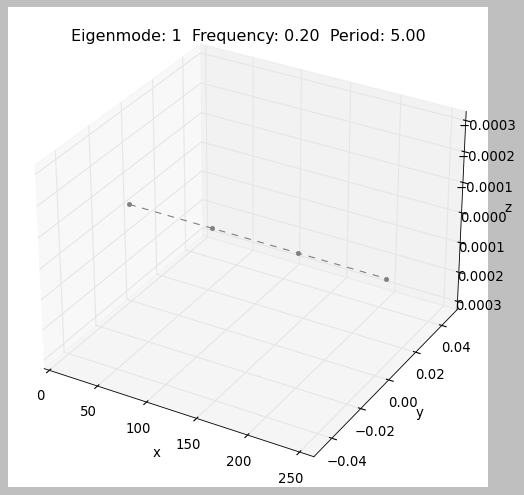

Postprocessing in DynamicAnalysis derived class 

Plotting result for a selected time step in DynamicAnalysis 

Plotting result for a selected time step in DynamicAnalysis 

Plotting result for a selected time step in DynamicAnalysis 

Plotting result for a selected step in DynamicAnalysis 

Plotting result for a selected step in DynamicAnalysis 

Plotting result for a selected step in DynamicAnalysis 

Animating time history in DynamicAnalysis 

Copying time step solution from solver


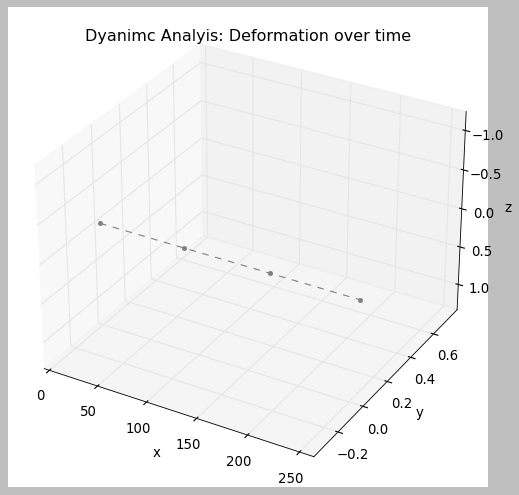

KeyError: 'kinetic_energy'

In [30]:
# create initial model
beam_model = StraightBeam(parameters['model_parameters'])

# additional changes due to optimization
if 'optimization_parameters' in parameters:
    # return the model of the optimizable instance to preserve what is required by analyzis
    from source.model.optimizable_structure_model import OptimizableStraightBeam
    beam_model = OptimizableStraightBeam(
        beam_model, parameters['optimization_parameters']['adapt_for_target_values']).model
else:
    print('No need found for adapting structure for target values')

# ==============================================
# Analysis wrapper

analyses_controller = AnalysisController(
    beam_model, parameters['analyses_parameters'])
analyses_controller.solve()
analyses_controller.postprocess()